# Solving the Van der Pol oscillator with the DeepXDE Framework
Raihaan Usman, UROP Student

DeepXDE is a data-driven framework developed by researchers at Brown University.

In [36]:
import deepxde as dde
import numpy as np
from scipy.integrate import odeint, solve_ivp

### Example of a first order linear ODE system

In [37]:
def simple_ode_system(x, y):
    """ODE system.
    dy1/dx = y2
    dy2/dx = -y1
    """
    # Most backends
    y1, y2 = y[:, 0:1], y[:, 1:]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)

    return [dy1_x - y2, dy2_x + y1]


# Boundary conditions
def boundary(_, on_initial):
    return on_initial               # on_initial: True for initial condition


def func(x):            # The reference solution - either analytical or numerical with scipy.integrate.solve_ivp
    """
    y1 = sin(x)
    y2 = cos(x)
    """
    return np.hstack((np.sin(x), np.cos(x)))


# Create a time domain geometry
geom = dde.geometry.TimeDomain(0, 10)

# Define the initial conditions
ic1 = dde.icbc.IC(geom, lambda x: 0, boundary, component=0)
ic2 = dde.icbc.IC(geom, lambda x: 1, boundary, component=1)

# Create a PDE problem object
data = dde.data.PDE(geom, simple_ode_system, [ic1, ic2], 35, 2, solution=func, num_test=100)    

layer_size = [1] + [50] * 5 + [2]                           # Neural network topology
activation = "tanh"                                         # Activation function
initializer = "Glorot uniform"                              # Initializer for the weights
net = dde.nn.FNN(layer_size, activation, initializer)       # Create the neural network

# Create a Model using the PDE and neural network definitions
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=50000)

Compiling model...
Building feed-forward neural network...
'build' took 0.076768 s



/opt/python/3.10.4/lib/python3.10/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+37=37. 
  warnings.warn("The balance properties of Sobol' points require "
/opt/python/3.10.4/lib/python3.10/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.587234 s

Initializing variables...
Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [1.13e-02, 4.81e-02, 0.00e+00, 1.00e+00]    [1.04e-02, 4.92e-02, 0.00e+00, 1.00e+00]    [1.05e+00]    
1000      [5.70e-03, 3.98e-03, 7.41e-07, 1.12e-04]    [6.12e-03, 3.87e-03, 7.41e-07, 1.12e-04]    [5.88e-01]    
2000      [5.30e-05, 8.26e-05, 1.07e-07, 2.44e-07]    [3.86e-04, 6.73e-04, 1.07e-07, 2.44e-07]    [7.35e-02]    
3000      [1.71e-05, 1.55e-05, 2.26e-07, 1.61e-07]    [1.31e-03, 9.23e-04, 2.26e-07, 1.61e-07]    [6.87e-02]    
4000      [1.32e-04, 7.09e-05, 2.66e-06, 2.37e-06]    [1.55e-03, 1.47e-03, 2.66e-06, 2.37e-06]    [7.59e-02]    
5000      [6.38e-07, 2.96e-06, 6.16e-09, 2.53e-08]    [1.42e-03, 1.68e-03, 6.16e-09, 2.53e-08]    [7.95e-02]    
6000      [4.41e-07, 1.68e-06, 4.20e-12, 1.39e-10]    [1.45e-03, 2.19e-03, 4.20e-12, 1.39e-10]    [8.49e-02]    
7000      [5.15e-07, 1.2

KeyboardInterrupt: 

Saving loss history to /workspaces/UROP-Notes/src/loss.dat ...
Saving training data to /workspaces/UROP-Notes/src/train.dat ...
Saving test data to /workspaces/UROP-Notes/src/test.dat ...


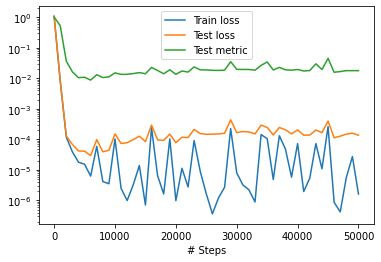

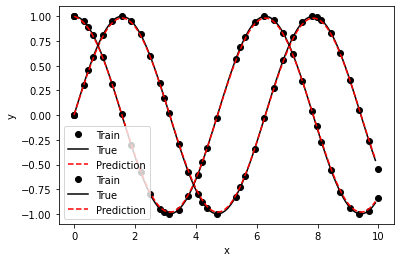

In [ ]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

### Van der Pol Solver

In [40]:
mu = 0              # Damping factor in the Van Der Pol equation
X0 = [0.5, 0]


# The PDE problem
def VdP(t, y):
    dy_dt = dde.grad.jacobian(y, t)
    d2y_dt2 = dde.grad.hessian(y, t)
    return  d2y_dt2 - mu * (1 - y ** 2) * dy_dt + y


# Numerical function for VdP oscillator
def func(t):
    ODE = lambda t, X: np.array([X[1], mu*(1-X[0]**2)*X[1]-X[0]])

    # Solving ODE
    # sol = solve_ivp(ODE, t_span=[t-1,t+1], y0=X0, t_eval=[t])
    # x_true, y_true = sol.y
    # return zeros size of t
    return 1e-9 * t


Compiling model...
Building feed-forward neural network...
'build' took 0.050298 s

'compile' took 0.597640 s

Initializing variables...
Training model...

0         [8.86e-04, 1.00e+00, 2.67e-02]              [9.46e-04, 1.00e+00, 2.67e-02]              [5.52e+07]    
1000      [6.05e-04, 4.26e-07, 2.21e-08]              [5.17e-04, 4.26e-07, 2.21e-08]              [5.81e+07]    
2000      [5.14e-04, 3.27e-07, 2.35e-10]              [4.71e-04, 3.27e-07, 2.35e-10]              [5.90e+07]    
3000      [4.25e-04, 2.58e-07, 8.23e-13]              [4.13e-04, 2.58e-07, 8.23e-13]              [5.97e+07]    
4000      [3.31e-04, 1.81e-07, 7.73e-08]              [3.42e-04, 1.81e-07, 7.73e-08]              [6.17e+07]    
5000      [2.48e-04, 1.06e-07, 8.02e-12]              [2.80e-04, 1.06e-07, 8.02e-12]              [6.62e+07]    
6000      [1.97e-04, 5.77e-08, 6.64e-10]              [2.43e-04, 5.77e-08, 6.64e-10]              [7.19e+07]    
7000      [1.73e-04, 7.93e-07, 3.35e-06]             

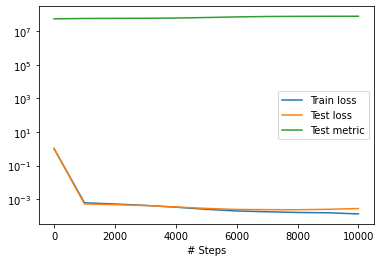

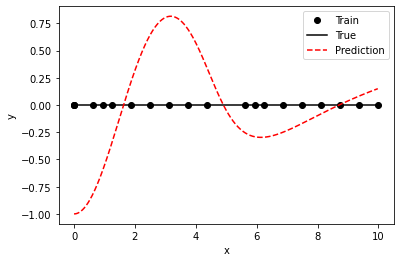

In [41]:
# Time domain definition
geom = dde.geometry.TimeDomain(0, 10)


def boundary_l(t, on_initial):
    return on_initial and np.isclose(t[0], 0)


# y1(0) = 0.5
def bc_func1(inputs, outputs, X):
    return outputs - 0.5

# y2(0) = 0
def bc_func2(inputs, outputs, X):
    return dde.grad.jacobian(outputs, inputs, i=0, j=None)


ic1 = dde.icbc.IC(geom, lambda x: -1, lambda _, on_initial: on_initial)
ic2 = dde.icbc.OperatorBC(geom, bc_func2, boundary_l)

data = dde.data.TimePDE(geom, VdP, [ic1, ic2], 16, 2, solution=func, num_test=500)
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile(
    "adam", lr=0.001, metrics=["l2 relative error"], loss_weights=[0.01, 1, 1]
)
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)